In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
import math
import requests

In [2]:
response = requests.get(
    "https://api.data.gov.hk/v2/filter?q=%7B%22resource%22%3A%22http%3A%2F%2Fwww.chp.gov.hk%2Ffiles%2Fmisc%2Fenhanced_sur_covid_19_eng.csv%22%2C%22section%22%3A1%2C%22format%22%3A%22json%22%7D"
)
response_data = response.json()
df = pd.json_normalize(response_data)

In [3]:
df["Report date"] = pd.to_datetime(df["Report date"], format="%d/%m/%Y")
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
grouped = df.groupby("Classification*")


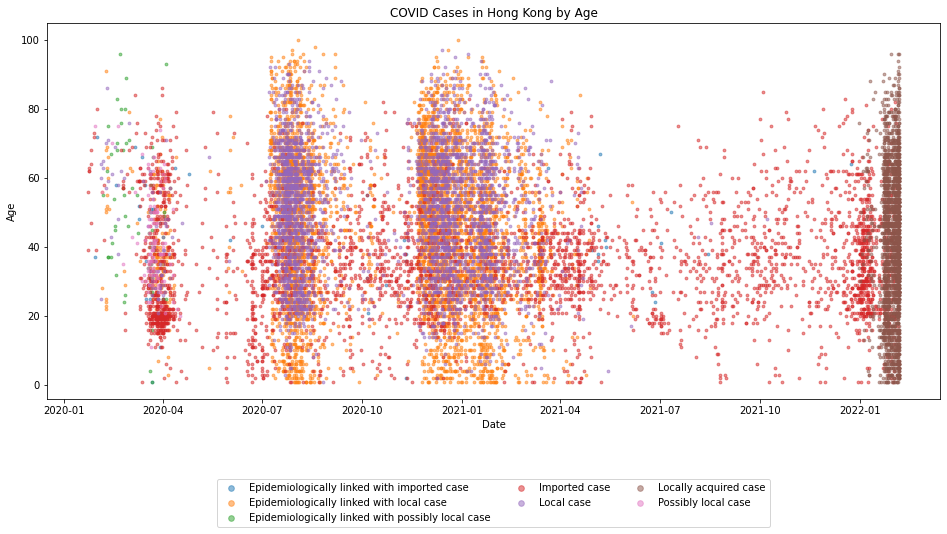

In [5]:
colors = [
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
    "tab:pink",
    "tab:gray",
    "tab:olive",
    "tab:cyan",
]
fig, ax = plt.subplots(figsize=(16, 9))
group_idx = 0
legends = []
for key, group in grouped:
    if key == "":
        continue
    group.plot(
        ax=ax,
        kind="scatter",
        x="Report date",
        y="Age",
        c=colors[group_idx],
        s=8,
        alpha=0.5,
    )
    legends.append(key)
    group_idx += 1

plt.legend(
    legends,
    markerscale=2,
    loc="upper center",
    bbox_to_anchor=(0.5, -0.2),
    ncol=math.floor(len(legends) / 2),
)


plt.title("COVID Cases in Hong Kong by Age")
plt.xlabel("Date")
plt.ylabel("Age")


# plt.xticks(rotation=50)
plt.subplots_adjust(bottom=0.3)
